# Heart Disease Prediction using Machine Learning
In this projcet we will build a mahchine learning model which will predict whether or not a person has heart disease based on his/her different clinical parameters. That means it's a classification problem. Here, we will accomplish the whole project according to the following machine learning framework/workflow-
### I. Data collection
### II. Data modelling
    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
        i.  Get the data ready
            a. Import data
            b. Preprocess data
                * Clean data
                    -> Clean missing data
                        * Remove the rows with missing data
                        * Fill the missing data (also called imputation)
                    -> Clean outlier
                * Transform data (i.e. Feature encoding)
                    -> Transform categorical data to numerical (Binarization)
                    -> Transform numerical data to categorical (Discretization)
                    -> Convert unit(s) of variable(s)
                * Reduce data
                    -> Reduce dimensions
                    -> Normalize data
            c. Split data
        ii. Choose a suitable model
        iii.Fit the model
        iv. Predict and evaluate
            a. Use the fitted model to make prediction on test data
            b. Evaluate the prediction based on suitable evaluation metrics
    6. Experimentation (For improving baseline model/metrics)
        Baseline model/metrics can be improved from two different perspectives-
        i. Model perspective: Try to find another better model(s) and/or tune the hyperparameters of the existing model(s)
        ii.Data perspective: Collect more data and/or try to improve the quality of data in different ways like using more robust methods for handling missing data and feature encoding etc. 
### III. Deployment

## I. Data Collection
The data are already collected in a csv file called [**heart-disease.csv**](./data/heart-disease.csv)

## II. Data Modelling

### 1. Problem definition
This is a classification problem where using machine learning model we have to predict whether or not a person has heart disease based on his/her different clinical parameters.

### 2. Data
The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. Among these, 13 attributes are independent (i.e. different medical attributes) and based on these the remaining dependent/target variable (which indicates if the patient has heart disease) will be predicted.

### 3. Evaluation
If our model gains **95% accuracy** in predicting heart disease, we will consider it deployable. 

### 4. Features
The description of all the 14 features used in the dataset (i.e. **Data Dictionary**) are as follows-
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

We have focused on theoretical aspects of step 2 (Data), 3 (Evaluation) and 4 (Features). Now we will do some hands-on practice involving these steps which can be considered as Exploratory Data Analysis (EDA).
### Exploratory Data Analysis (EDA)

In [65]:
# Import regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
# Load data
df = pd.read_csv("./data/heart-disease.csv")

In [67]:
# Get the shape
df.shape

(303, 14)

In [68]:
# View first 5 instances
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
#Get data type of the features
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

From above result we can see that all the attributes are numerical.

In [70]:
# Get different information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From above result we can see that there is no missing data in the dataset.

In [71]:
# Get different statistical description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [72]:
# Get the number/frequency of distinct values of the "target" variable
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [73]:
# Get the percentage of the number/frequency of distinct values of the "target" variable
df["target"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

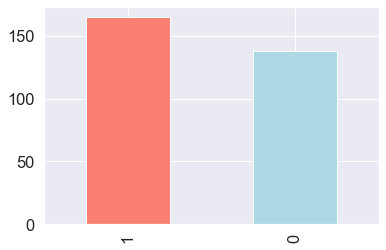

In [74]:
# Plot the number/frequency of distinct values of the "target" variable
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

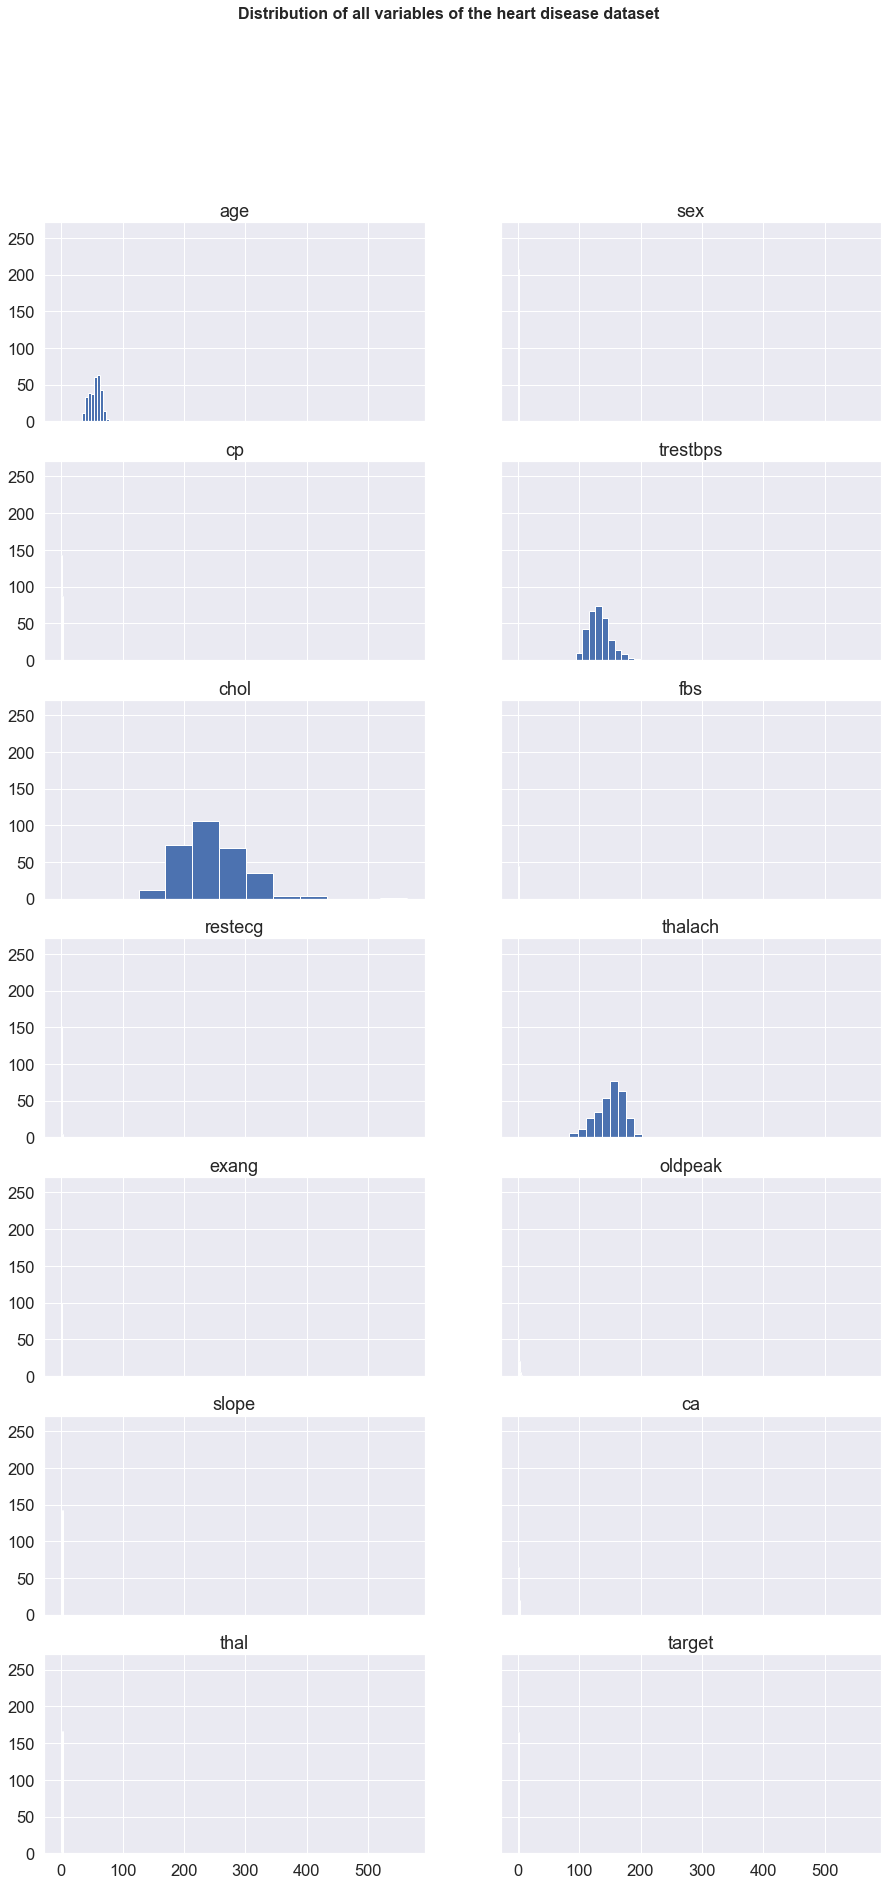

In [75]:
# View distribution/spread of the variables using histogram
# Setup plot (7 rows, 2 columns)
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9), (ax10, ax11), (ax12, ax13)) = plt.subplots(nrows=7,
                                                                                                             ncols=2,
                                                                                                             sharex=True,
                                                                                                             sharey=True,
                                                                                                             figsize=(15, 30))

# Add data for ax0
ax0.hist(df["age"])
# Customize ax0
ax0.set(title="age")

# Add data for ax1
ax1.hist(df["sex"])
# Customize ax1
ax1.set(title="sex")

# Add data for ax2
ax2.hist(df["cp"])
# Customize ax2
ax2.set(title="cp")

# Add data for ax3
ax3.hist(df["trestbps"])
# Customize ax3
ax3.set(title="trestbps")

# Add data for ax4
ax4.hist(df["chol"])
# Customize ax4
ax4.set(title="chol")

# Add data for ax5
ax5.hist(df["fbs"])
# Customize ax5
ax5.set(title="fbs")

# Add data for ax6
ax6.hist(df["restecg"])
# Customize ax6
ax6.set(title="restecg")

# Add data for ax7
ax7.hist(df["thalach"])
# Customize ax7
ax7.set(title="thalach")

# Add data for ax8
ax8.hist(df["exang"])
# Customize ax8
ax8.set(title="exang")

# Add data for ax9
ax9.hist(df["oldpeak"])
# Customize ax9
ax9.set(title="oldpeak")

# Add data for ax10
ax10.hist(df["slope"])
# Customize ax10
ax10.set(title="slope")

# Add data for ax11
ax11.hist(df["ca"])
# Customize ax11
ax11.set(title="ca")

# Add data for ax12
ax12.hist(df["thal"])
# Customize ax12
ax12.set(title="thal")

# Add data for ax13
ax13.hist(df["target"])
# Customize ax13
ax13.set(title="target")

# Title the figure
fig.suptitle("Distribution of all variables of the heart disease dataset", fontsize=16, fontweight='bold');

In the distribution of the variables, no outlier is seen

In [76]:
# Get frequency of different sex with respect to different heart disease conditions/target
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


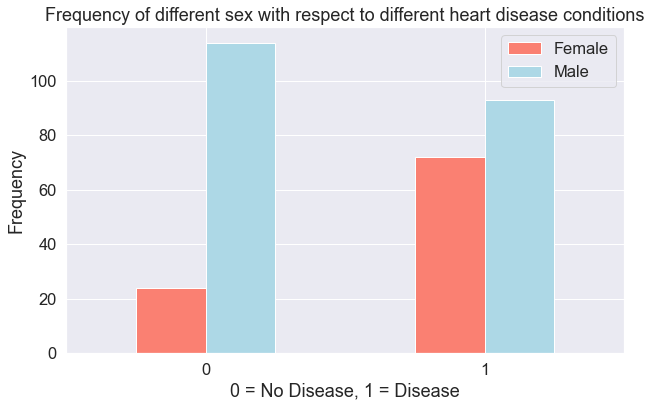

In [77]:
# Visualize frequency of different sex with respect to different heart disease conditions (found above using crosstab)
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Frequency of different sex with respect to different heart disease conditions")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

From the dataset we know, for the *sex* column the value 0 = Female and 1 = Male. And from the comparison of **frequency of different sex with respect to different heart disease conditions** we can infer the followings-

Since there are (24+72)=96 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a (72*100)/96 = 75% chance she has heart disease.

On the other hand, there are (114+93)=207 males of which (93*100)/207 = 44.93% have heart disease. So we might predict, if the participant is a male, 44.93% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a (75+44.93)/2 = 59.97% chance he/she has heart disease.

This can be our very simple baseline, we'll try to beat it with machine learning.

In [78]:
# Get frequency of different heart disease conditions with respect to different chest pain (cp) types
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


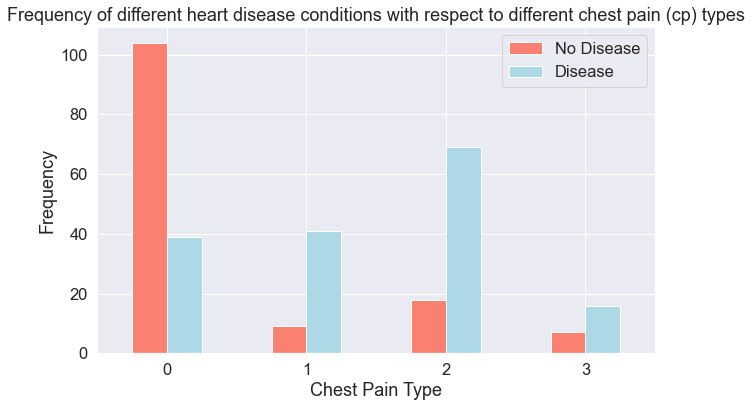

In [79]:
# Visualize frequency of different heart disease conditions with respect to different chest pain (cp) types
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["salmon", "lightblue"])

# Add attributes to the plot to make it more readable
plt.title("Frequency of different heart disease conditions with respect to different chest pain (cp) types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

According to the data dictionary, different types of chest pain (cp) are-
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

An interesting aspect observed from the comparison of **Frequency of different heart disease conditions with respect to different chest pain (cp) types** is, the atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

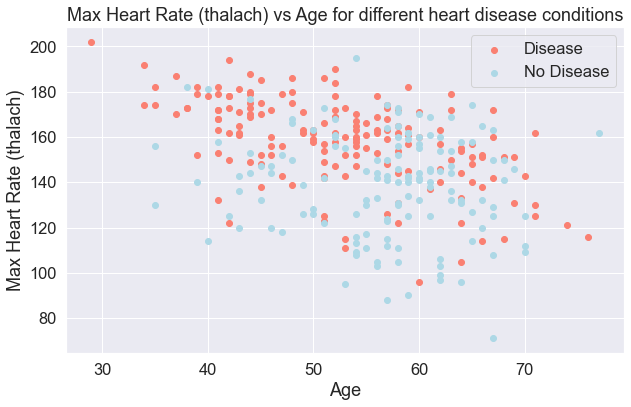

In [80]:
# Visual comparison of max heart rate (thalach) and age for different heart disease conditions (target=0 or 1) using scatter plot
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Max Heart Rate (thalach) vs Age for different heart disease conditions")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(["Disease", "No Disease"]);

From the scatterplot above we can infer that, the chance of having heart disease among the youngers is higher who has higher max heart rate (thalach). Same goes for the olders. The chance of having heart disease among the olders with lower max heart rate (thalach) is not negligible though.

Another insight revealed from this scatterplot is, the number of older participants is greater than the number of younger participants no matter what their max heart rate (thalach) and heart disease conditions are. This insight is also revealed in the distribution of the age variable above.

In [81]:
# Find the correlation among variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


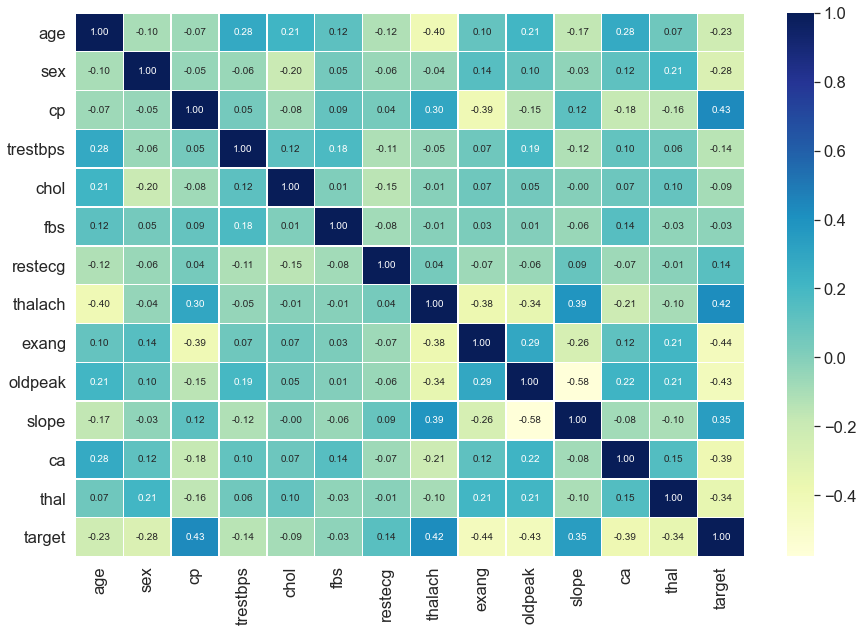

In [82]:
# Let's make the correlation matrix look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

We have done sufficient Exploratory Data Analysis (EDA) for the project. Now, let's proceed to the modelling step.

### 5. Modelling

#### i. Get the data ready

**a. Import data**

The data are already imported as *df* dataframe.

**b. Preprocess data**

    * Clean data
        -> Clean missing data: We found no missing data using df.info() during EDA.
        -> Clean outlier: We found no outlier in the distribution of the variables during EDA.
    * Transform data
        -> During EDA we found that all of the data are in numerical format. This is what we actually need for this project. So, no transformation is required. No unit conversion is required as well.
    * Reduce data
        -> No data reduction strategy is required.
**C. Split data**

In [83]:
# Get all independent variables
X = df.drop("target", axis=1)

# Get target variable
y = df["target"]

In [84]:
# View independent variables
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [85]:
# View target variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [86]:
# Import function for train-test split
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [87]:
# View X_train
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [88]:
# View y_train and its length
y_train.head(), len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
 Name: target, dtype: int64,
 242)

In [89]:
# View X_test
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [90]:
# View y_test and its length
y_test.head(), len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
 Name: target, dtype: int64,
 61)

#### ii. Choose a suitable model
We will try 3 different machine learning models as our baseline models. These are **K-Nearest Neighbors**, **Logistic Regression** and **Random Forest**.

In [91]:
# Import the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate the models and put them in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

#### iii. Fit the model + iv. Predict and evaluate

In [92]:
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [93]:
# Call the function to fit and score models
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
# View the scores
model_scores

C:\Users\User\Desktop\my_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

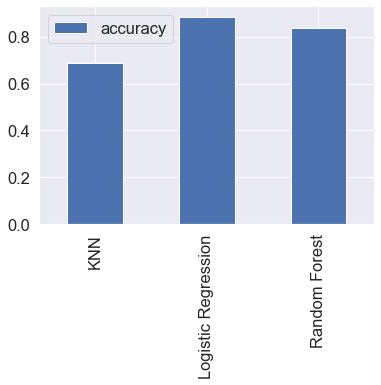

In [94]:
# Visualize the scores of the baseline models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

We can see that, the baseline metric (accuracy) of the K-Neighbors Classifier is the lowest among three models and far away from the required score of accuracy (95%). Therefore, we would like to discard this model and proceed to the **Experimentation** step with the remaining two models.

### 6. Experimentation

#### Hyperparameter tuning
Let's try to improve our models from the **model perspective**. More specifically, we are going to improve the models by tuning some of their hyperparameters.

#### Tuning hyperparameters with RandomizedSearchCV
First we will tune the *Logistic Regression* model.

In [95]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression (i.e. RandomizedSearchCV version of LogisticRegression)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [96]:
# Get the best hyperparameters combination
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [97]:
# Evaluate the model tuned with the best combination of hyperparameters
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We can see that, the *Logistic Regression* model gives the same *accuracy score* even after hyperparameter tuning. Now, let's tune the *Random Forest* model.

In [98]:
# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


In [99]:
# Get the best hyperparameters combination
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [100]:
# Evaluate the model tuned with the best combination of hyperparameters
rs_rf.score(X_test, y_test)

0.8688524590163934

We can see that, the *Random Forest* model has been slightly improved through hyperparameter tuning (the baseline score was 0.8360655737704918). Inspite of this, the score of the *Logistic Regression* model is slightly better. Therefore, we would like to discard the *Random Forest* model and proceed forward with the *Logistic Regression* model for further improvement. This time we will use **GridSearchCV** for hyperparameter tuning.

#### Tuning hyperparameters with GridSearchCV

In [101]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for LogisticRegression (for now we keep this same as the grid used in RandomizedSearchCV)
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression (i.e. GridSearchCV version of LogisticRegression)
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [102]:
# Get the best hyperparameters combination
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [103]:
# Evaluate the model tuned with the best combination of hyperparameters
gs_log_reg.score(X_test, y_test)

0.8852459016393442

We can see that, even after tuning hyperparameters using GridSearchCV the *accuracy score* of the **Logistic Regression** model remains unchanged. Inspite of this, this is the best scroe and thus **Logistic Regression** is the best model we have used so far in this project.

#### Evaluation beyond accuracy

Now we would like to evaluate the best model based on some other evaluation metrics such as **ROC curve and AUC score**, **Confusion matrix**, **Classification report**, **Precision**, **Recall**, **F1-score** etc. To access these, we'll have to use our model to make predictions on the test set.

In [104]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [105]:
# View y_preds
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [106]:
# View y_test
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

#### ROC Curve and AUC Score

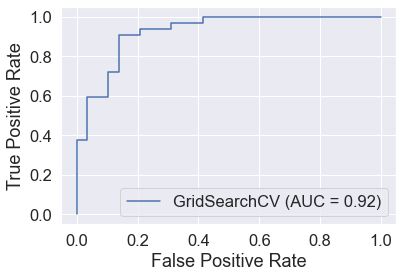

In [107]:
# Import plot_roc_curve
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, X_test, y_test);

From the figure above we can see that, the AUC score is 0.92

#### Confusion matrix

In [108]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Get confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Let's make the confusion matrix more visual by using Seaborn's `heatmap()`

In [109]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

# Defining a function for plotting
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

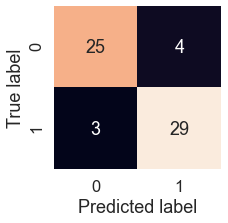

In [110]:
# Call the function for plotting confusion matrix
plot_conf_mat(y_test, y_preds)

Scikit-learn provides confusion matrix in the following format-

<img src="./images/confusion_matrix_sklearn.png" width=500/>

According to our `heart disease data set`, (for the target variable) the value 0 = Negative (No heart disease) and 1 = Positive (Heart disease). Therefore, we get our confusion matrix in the following format-

<img src="./images/confusion_matrix_project.png" width=500/>

We can extract the following information from the confusion matrix-

Total count (i.e. number of predictions), N = 25+3+29+4 = 61

True positive (i.e. count of true positive), TP = 29

True negative, TN = 25

False positive (i.e. Type 1 error), FP = 4

False negative (i.e. Type 2 error), FN = 3

**Accuracy** = (TP + TN)/N = (29+25)/61 = 0.8852

Misclassification rate = (FP + FN)/N = (4+3)/61 = 0.1148

True positive rate (also called **Sensitivity** or **recall**) = (TP / actual count of positive) = 29/(3+29) = 0.9063

True negative rate (also called **Specificity**) = (TN / actual count of negative) = 25/(25+4) = 0.8621

False positive rate = (FP / actual count of negative) = 4/(25+4) = 0.1379

False negative rate = (FN / actual count of positive) = 3/(3+29) = 0.0938

**Precision** = (TP / total predicted positive) = 29/(4+29) = 0.8788

**F1-score** = (2 * Precision * Recall) / (Precision + Recall) = (2 * 0.8788 * 0.9063) / (0.8788 + 0.9063) = 0.8923

#### Classification report

In [111]:
# Import classification_report
from sklearn.metrics import classification_report

# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We can see that, while accuracy, precision, recall and F1-score can be extracted from confusion matrix, classification report directly provides them. Another noticable point is classification report provides precision, recall and F1-score classwise.

#### Cross-validated evaluation metrics

The evaluation metrics we have calculated so far are basically based on single training and test set. But we can get the metrics as more robust and reliable by making them cross-validated. For that purpose we can use `cross_val_score()`.

Let's calculate different cross-validated metrics for the best model (`Logistic Regression`) with its best hyperparameters combination using `cross_val_score()`.

In [112]:
# Check best hyperparameters (found with GridSearchCV)
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [113]:
# Instantiate best model with best hyperparameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [114]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

In [115]:
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="accuracy"))
cv_acc

0.8479781420765027

In [116]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="precision"))
cv_precision

0.8215873015873015

In [117]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring="recall"))
cv_recall

0.9272727272727274

In [118]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1"))
cv_f1

0.8705403543192143

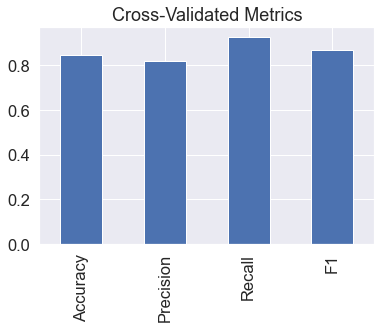

In [119]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

At this point of experiment we have got **Logistic Regression** as the best model so far with its `cross-validated` accuracy score (0.8479781420765027, or around 85%) which is quite less than the expected accuracy score (95%).

Let's save the best model.

In [120]:
# Import pickle
import pickle

# Save the model
pickle.dump(gs_log_reg, open("logistic_regression_classifier_for_heart_disease.pkl", "wb"))

#### Feature importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

For our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), we find that the `coef_` attribute is the coefficient of the features in the decision function. That means using `coef_` attribute we can get feature importance for a logistic regression model.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [121]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [122]:
# Get feature importance for clf
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

We will combine these values of feature importance with corresponding columns (features) of our dataframe.

In [123]:
# Match values of feature importance to corresponding features
features_dict = dict(zip(df.columns, list(clf.coef_[0])))

# View the association of features with their importances
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

Let's visualize it.

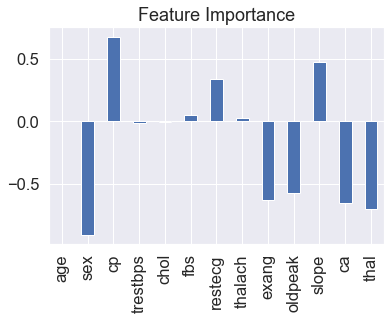

In [124]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Feature importance can provide some benefits such as-

* **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help us figure out more.
* **Redirecting efforts** - If some features offer far more value than others, this may change how we collect data for different problems (See the next point).
* **Less but better** - Similar to above, if some features are offering far more value than others, we could reduce the number of features our model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

#### Final remarks

As final remarks, it can be said that, here we have done experiments to improve the model(s) mainly from the **model perspective**, more specifically by tuning hyperparameters. But the expected accuracy score (95%) is not gained. Therefore, as the future attempts for getting a more improved model we can try-
* Some other model(s) (this is also a **model perspective** experiment)
* Some **data perspective** experiments like collecting more data, using more robust/sophisticated encoding techniques etc.